Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import linear_model , metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
df = sn.load_dataset("diamonds")

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


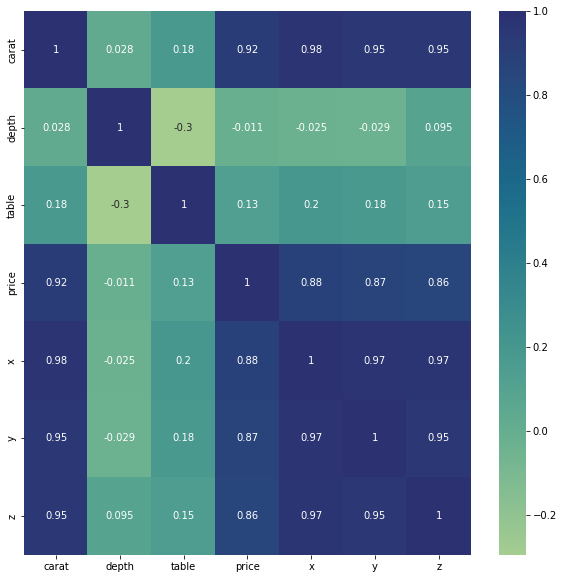

In [4]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True,cmap="crest")

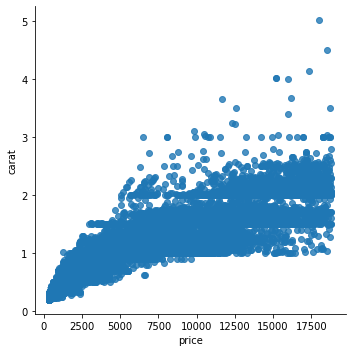

In [5]:
sn.lmplot(data=df , x = 'price' , y='carat' )

In [6]:
x = df[['carat']]
y = df['price']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 00)

In [7]:
model = linear_model.LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [8]:
print(f"coeifficent of determination {model.score(x_train , y_train)}")
print(f"intercept{model.intercept_}")
print(f'coeifficent{model.coef_}')
print(f"accuracy of the model: {metrics.r2_score(y_test , y_pred)*100}")
print(f'mean absolute error: {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test , y_pred)}')

coeifficent of determination 0.8487696910206598
intercept-2248.4600575510453
coeifficent[7745.25658243]
accuracy of the model: 85.15758113126249
mean absolute error: 1002.4842327661464
mean squared error: 2352772.794278969


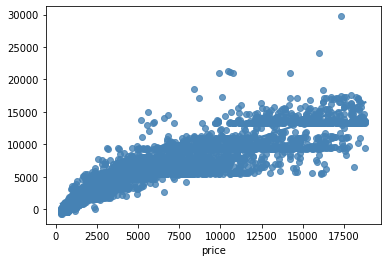

In [9]:
sn.regplot(x = y_test , y=y_pred , ci = None , color = 'steelblue')

In [10]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [11]:
pred_df

,Actual Value,Predicted Value,Difference
10176,4733,6271.322183,-1538.322183
16083,6424,7742.920934,-1318.920934
13420,5510,7045.847841,-1535.847841
20407,8770,9369.424816,-599.424816
8909,4493,4722.270867,-229.270867
...,...,...,...
42208,1289,1779.073365,-490.073365
3638,3435,4799.723432,-1364.723432
5508,3847,6116.417051,-2269.417051
19535,8168,5651.701657,2516.298343


multiple linear regression

In [12]:
y_1 = df['price']
x_1 = df[['carat','x' , 'y' , 'z']]
x_train_1 , x_test_1 , y_train_1 , y_test_1 = train_test_split(x_1 , y_1 , test_size = 0.2 , random_state = 00)

In [13]:
model = linear_model.LinearRegression()
model.fit(x_train_1 , y_train_1)
y_pred_1 = model.predict(x_test_1)

In [14]:
print(f"coeifficent of determination {model.score(x_train_1 , y_train_1)}")
print(f"intercept {model.intercept_}")
print(f'coeifficent {model.coef_}')
print(f"accuracy of the model: {metrics.r2_score(y_test_1 , y_pred_1)*100}")
print(f'mean absolute error: {metrics.mean_absolute_error(y_test_1 , y_pred_1)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test_1 , y_pred_1)}')

coeifficent of determination 0.8532378196607722
intercept 1799.7154292569994
coeifficent [10143.12303308  -854.15844089   132.05480168  -515.36606437]
accuracy of the model: 85.73782517388896
mean absolute error: 903.529165842338
mean squared error: 2260794.363431048


In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test_1,'Predicted Value':y_pred_1,'Difference':y_test_1-y_pred_1})

In [16]:
pred_df

,Actual Value,Predicted Value,Difference
10176,4733,6071.173378,-1338.173378
16083,6424,7612.698789,-1188.698789
13420,5510,6838.595498,-1328.595498
20407,8770,9320.778814,-550.778814
8909,4493,4509.730531,-16.730531
...,...,...,...
42208,1289,1769.486381,-480.486381
3638,3435,4612.007563,-1177.007563
5508,3847,5906.528051,-2059.528051
19535,8168,5453.311855,2714.688145


polynomial regression

In [28]:
poly = PolynomialFeatures(degree = 4)
xpoly = poly.fit_transform(x)
poly.fit(xpoly , y)
lin2 = linear_model.LinearRegression()
lin2.fit(xpoly, y)

LinearRegression()

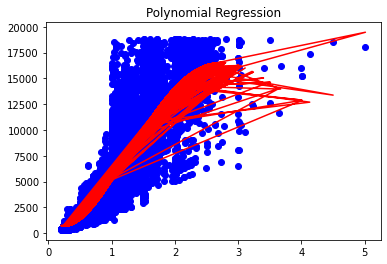

In [30]:
plt.scatter(x, y, color = 'blue')
  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.show()